In [1]:
import osmnx as ox
import networkx as nx
import random
import math
import pandas as pd
import matplotlib.pyplot as plt          
import numpy as np
import seaborn as sns

In [11]:
def smooth(y,w=51,o=1,d=2):
    from scipy.signal import savgol_filter
    nans = [float('nan') for i in range(0,d)] 
    y = nans + list(savgol_filter(y[d:],w,o))
    for i in range(0,len(y)):
        if y[i]<0:
            y[i] = 0
    return y

In [2]:
run_id = 15
rl = pd.read_csv('csv/rl_run_{}.csv'.format(run_id))
d = pd.read_csv('csv/demand_run_{}.csv'.format(run_id))
s = pd.read_csv('csv/supply_run_{}.csv'.format(run_id))

db = pd.read_csv('csv/demand_run_BL.csv')
sb = pd.read_csv('csv/supply_run_BL.csv')

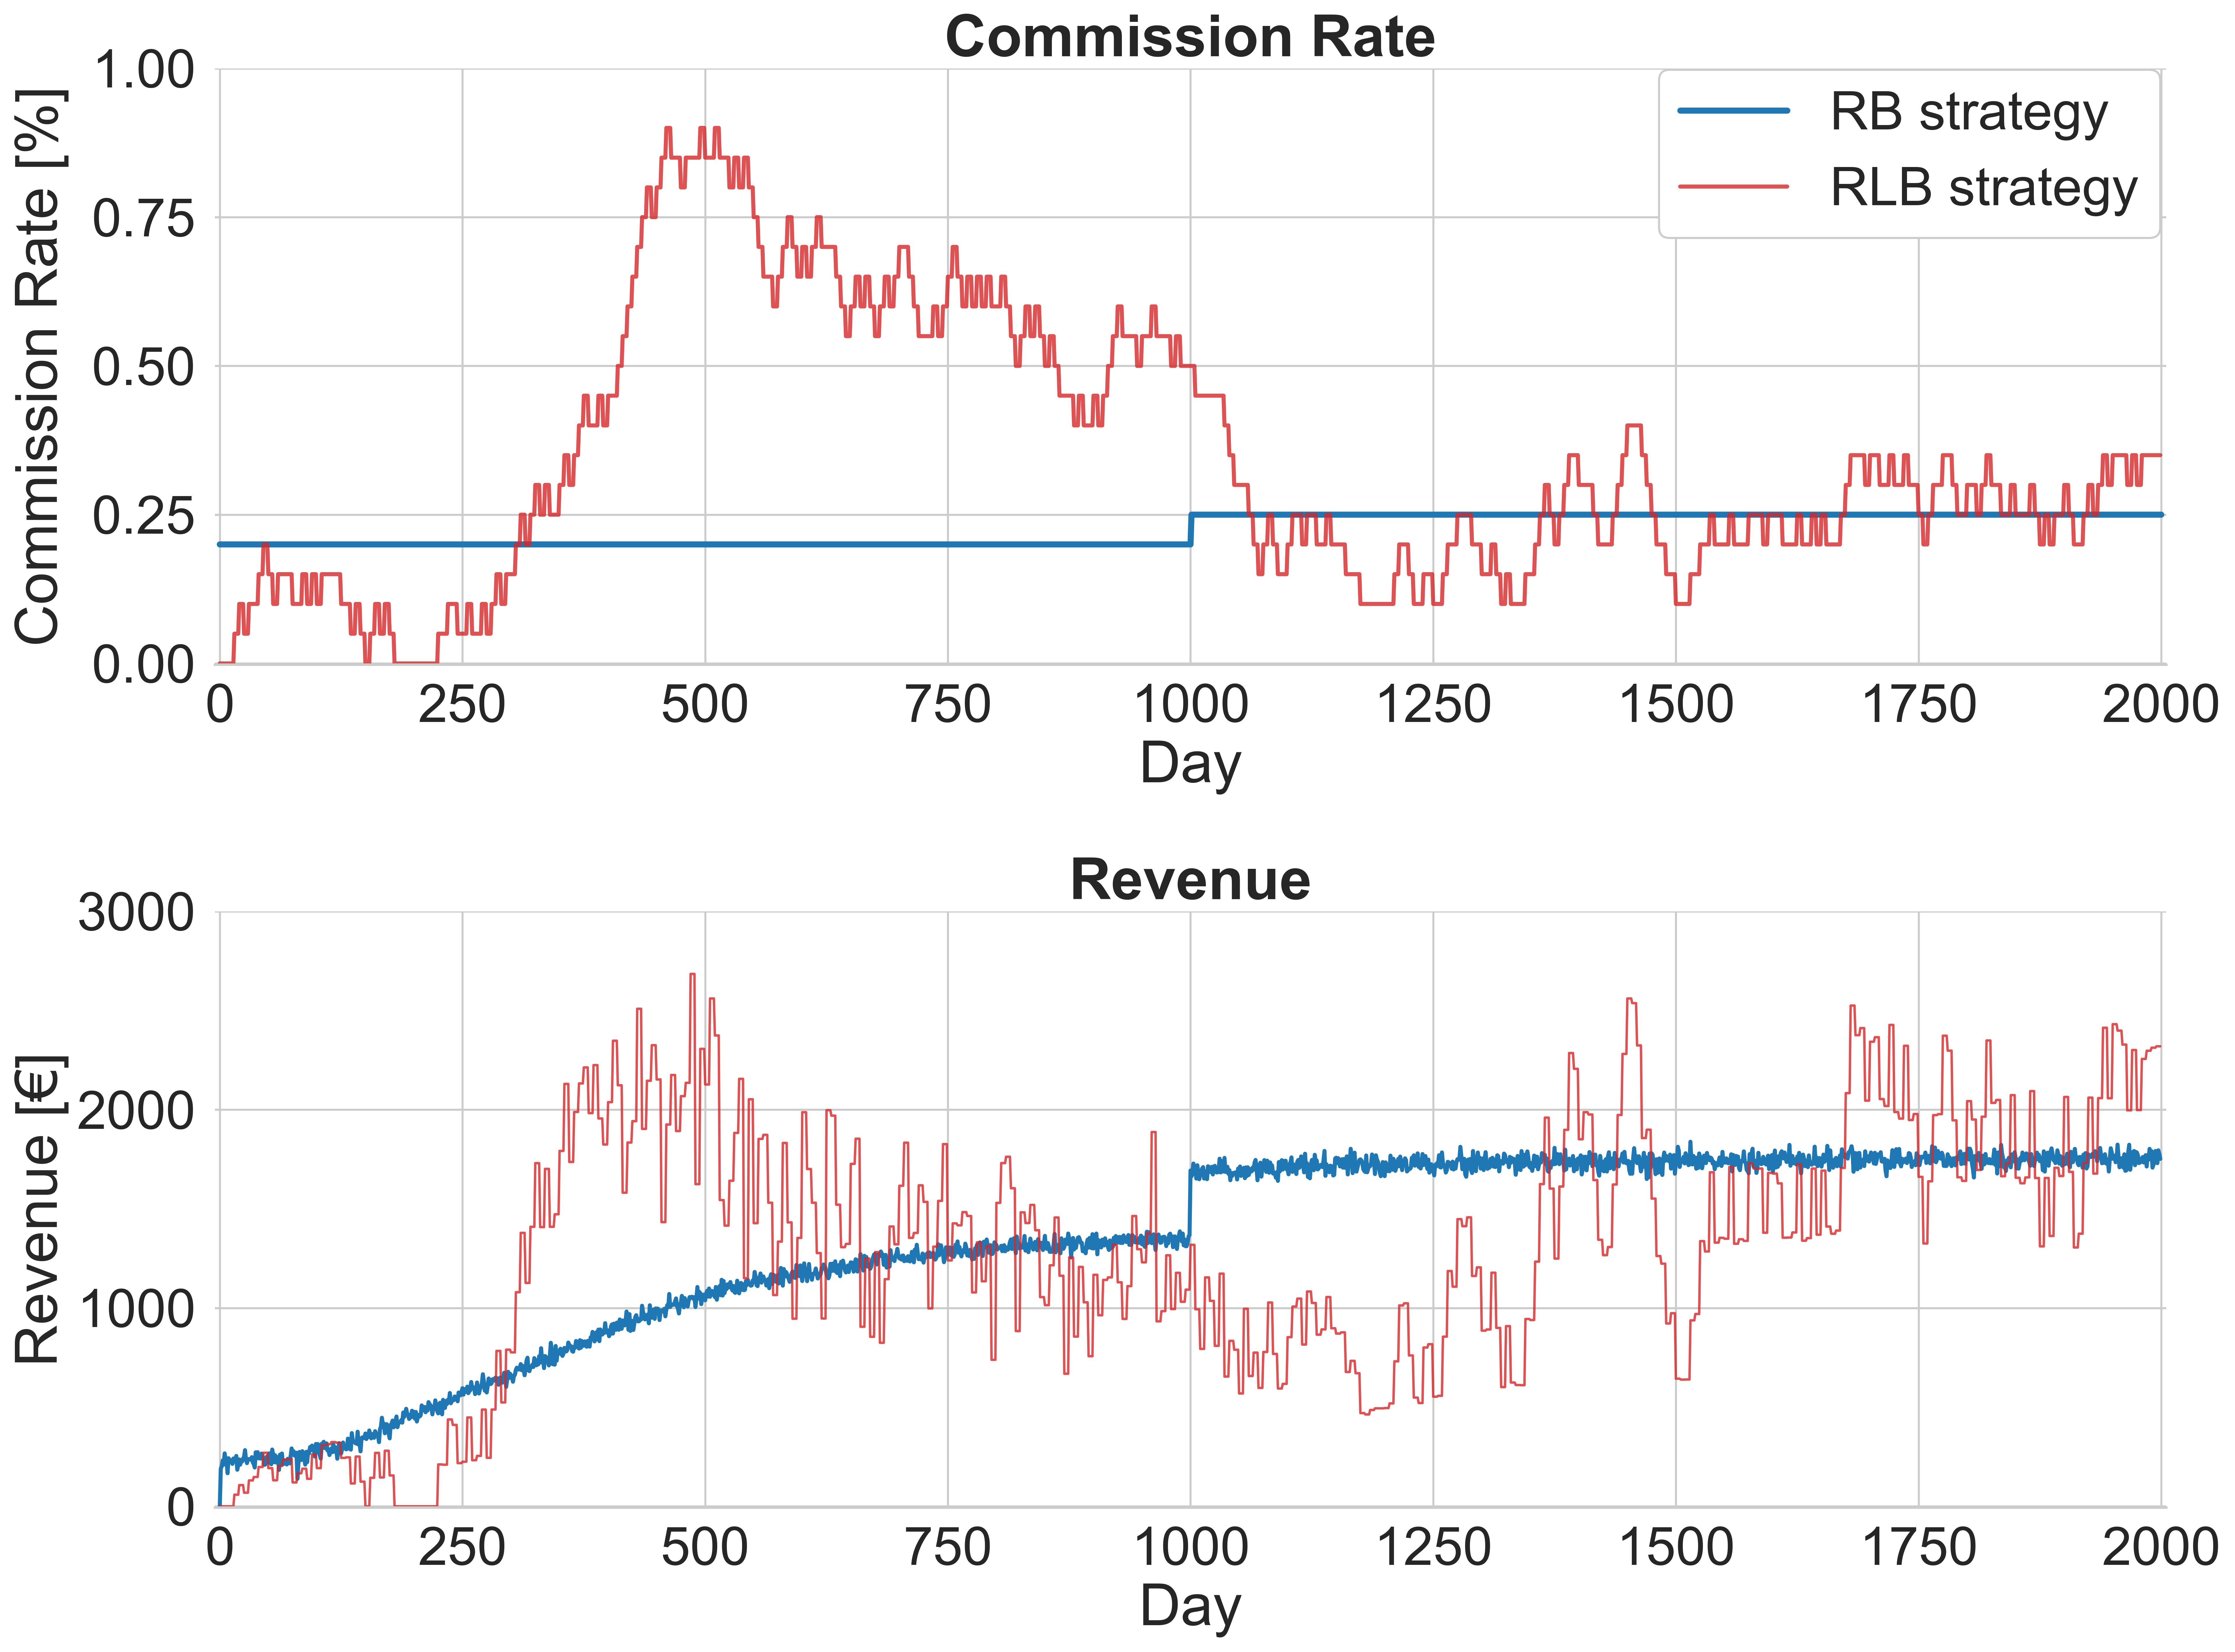

In [115]:
# Commission rate and Revenue

sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=2.4)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, figsize=(16,12))
# plt.subplots_adjust(wspace=0.3, hspace=0.4)
sns.despine(left=True)

sns.lineplot(x=[0,1000, 1001, 2000] , y=[0.20,0.20, 0.25,0.25], label = 'RB strategy', color=bc, lw=3, ax=ax[0])
sns.lineplot(x=rl.index , y=rl.comm_rate, label = 'RLB strategy', color=rc, lw=2, alpha=alpha, ax=ax[0])

ax[0].set(xlabel='Day', ylabel='Commission Rate [%]', ylim=(-0.002,1),  xlim=(-5,2005))
ax[0].set_title('Commission Rate',fontweight='bold')
ax[0].legend(loc=(0.74,0.716),framealpha=1)
#--------------------------------------------------------------------------------------
sns.lineplot(x=db.index , y=db.plat_revenue, label = 'RB strategy', color=bc, lw=2, ax=ax[1])
sns.lineplot(x=rl.index , y=rl.revenue, label = 'RLB strategy', color=rc, lw=1.2, alpha=alpha, ax=ax[1])

# sns.lineplot(x=db.index , y=db.plat_revenue.cumsum(), label = 'Baseline', color='C3', lw=2, ax=ax[1])
# sns.lineplot(x=rl.index , y=rl.revenue.cumsum(), label = 'RL', color='C0', lw=1, ax=ax[1])

ax[1].set(xlabel='Day', ylabel='Revenue [€]', ylim=(-6,3000),  xlim=(-5,2005))
ax[1].set_title('Revenue',fontweight='bold')
# ax[1].legend(loc=(0.76,0.65),framealpha=1)
ax[1].get_legend().set_visible(False)

fig.align_ylabels()
plt.tight_layout()
plt.savefig('Figs/itsc_Fig1.png')

In [131]:
rl.comm_rate[1750:2000].min()

0.2

In [114]:
db.plat_revenue[1900:2000].mean()

1753.405893

In [139]:
rl.revenue[1800:2000].mean()

1925.2954375000002

In [136]:
(2053.2812409999997-1753.405893)/1753.405893


0.1710244896502122

In [138]:
(0.12*1753.405893) + 1753.405893



1963.81460016

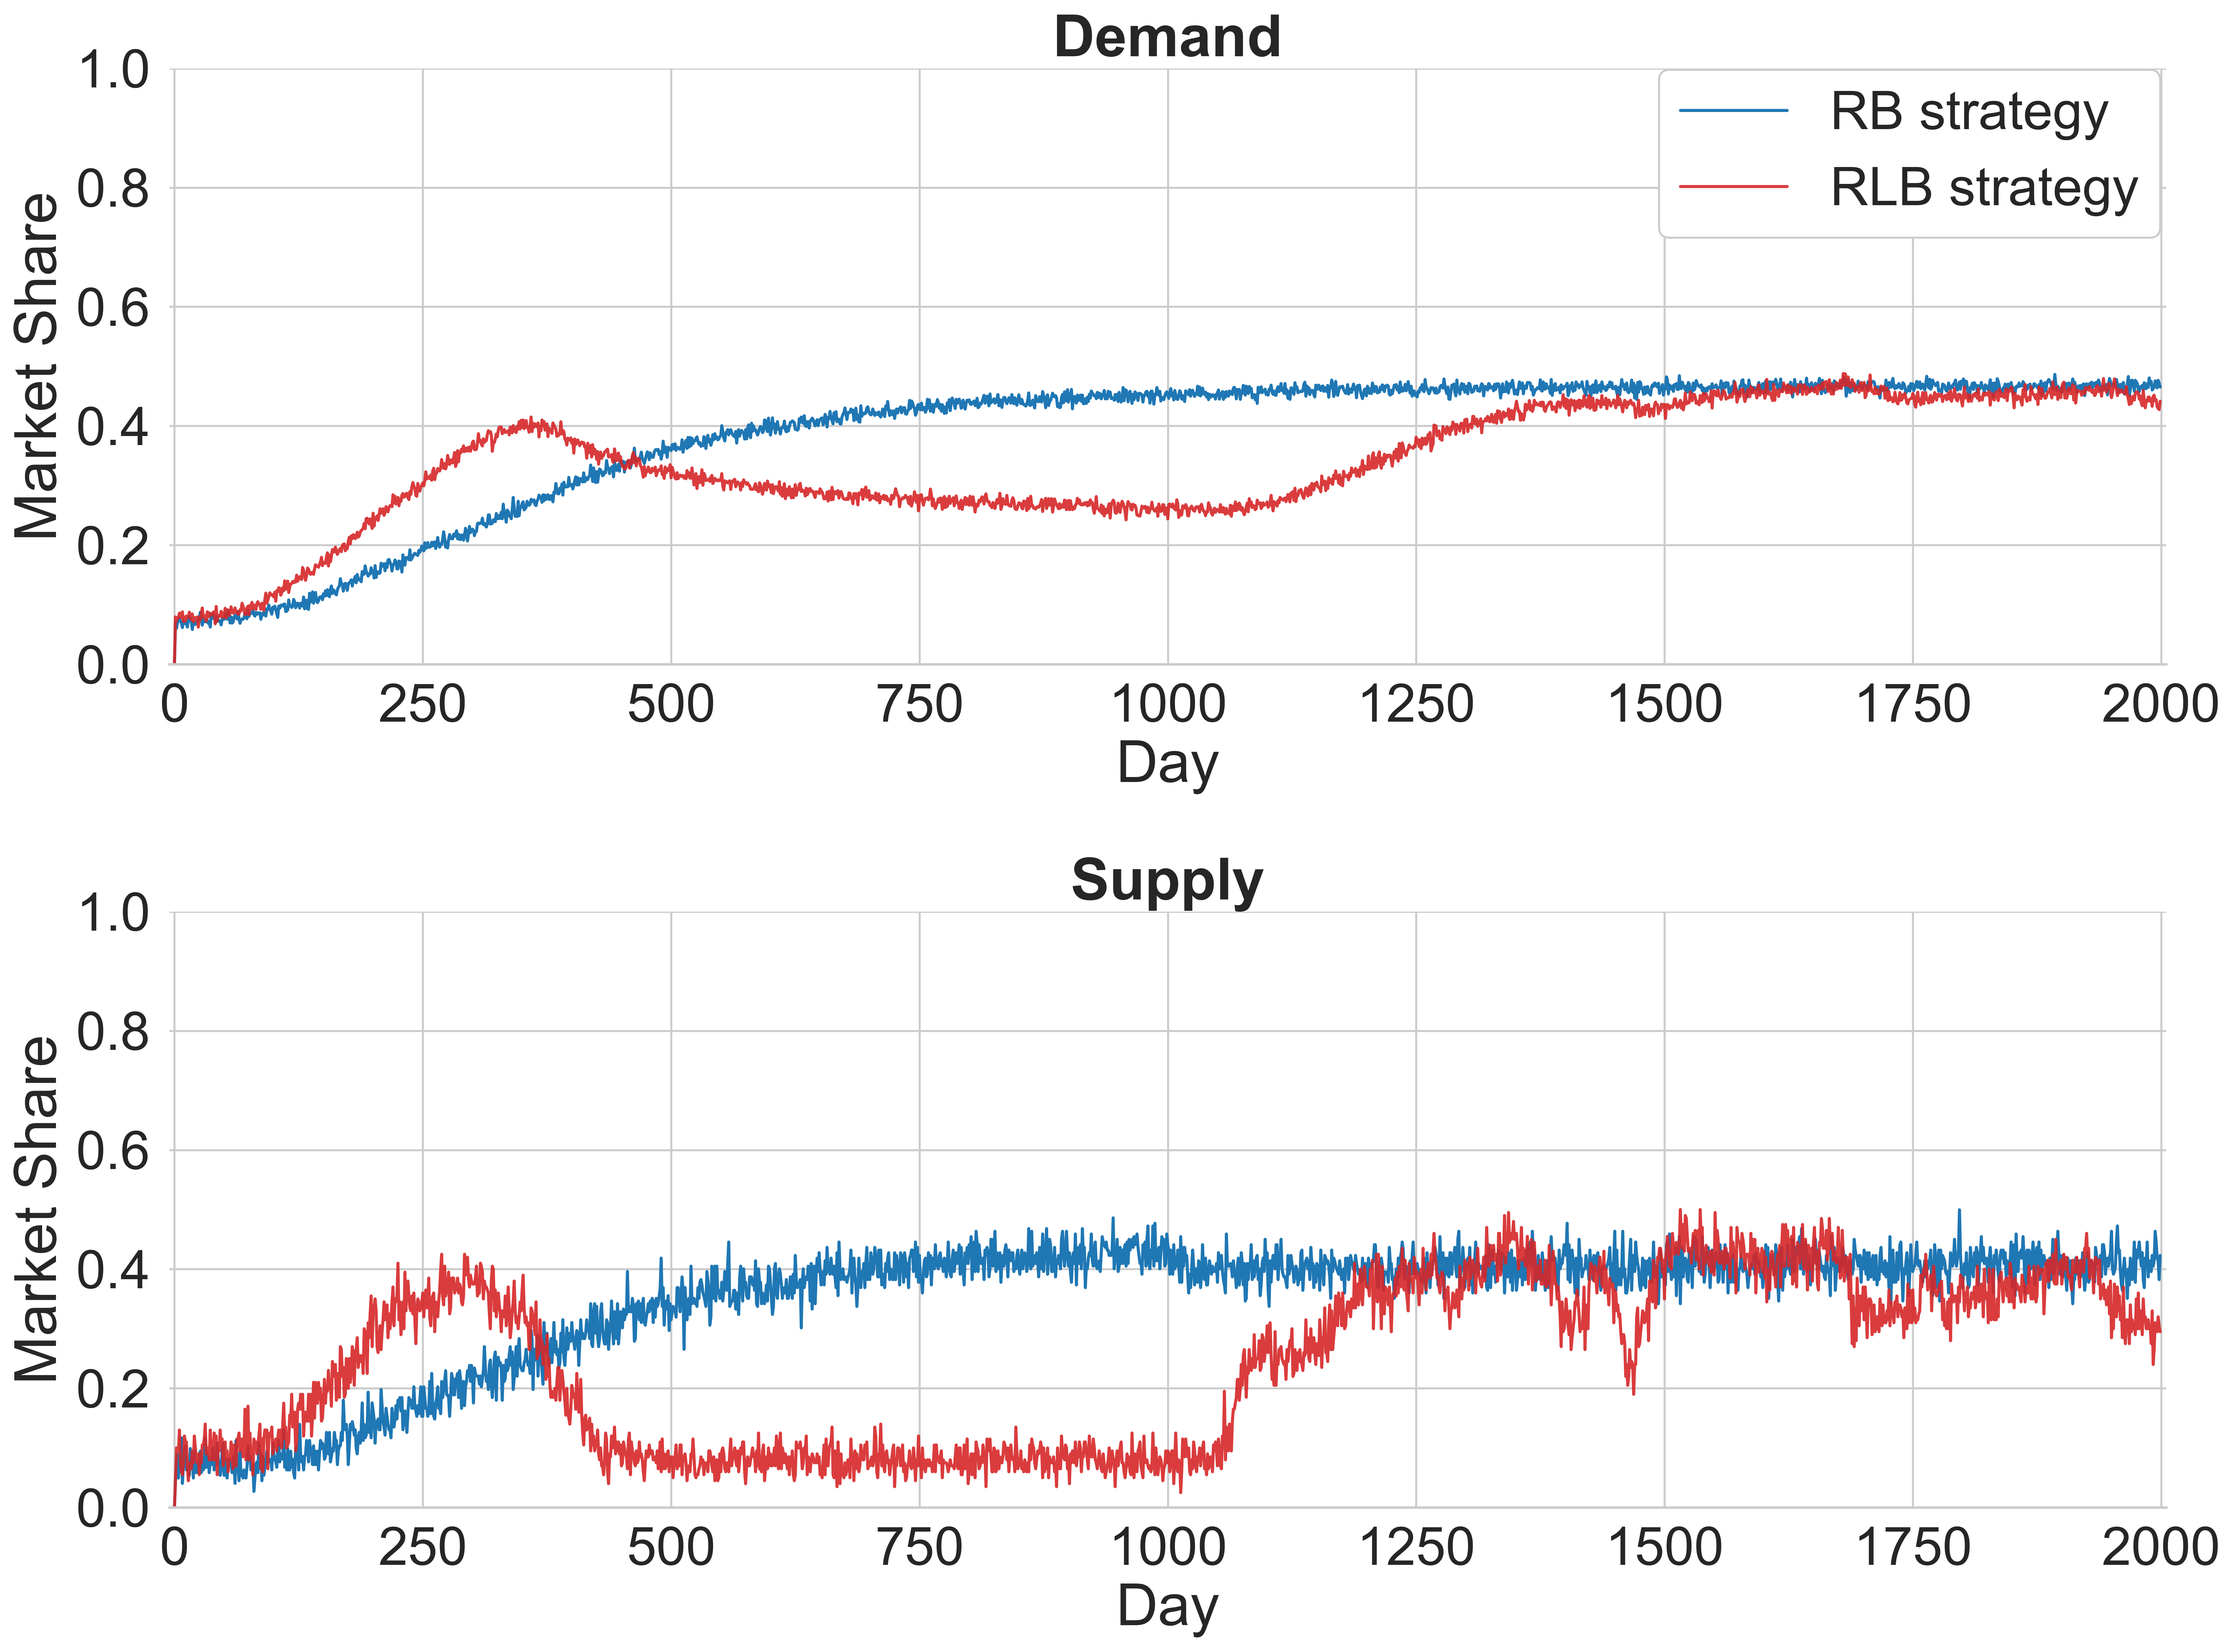

In [116]:
# Demand and Supply participation

sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=2.4)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, figsize=(16,12))
# plt.subplots_adjust(wspace=0.3, hspace=0.4)
sns.despine(left=True)
nP=2000; nV=200
bc = 'C0';rc = 'C3'
alpha=0.9

sns.lineplot(x=db.index , y=db.OUT/nP, label = 'RB strategy', color=bc, ax=ax[0])
sns.lineplot(x=d.index , y=d.OUT/nP, label = 'RLB strategy', color=rc, alpha=alpha, ax=ax[0])

# ax[0].vlines([1000], 0, 1, linestyles='dashed', colors='black')
# ax[0].grid(axis='x')
ax[0].set(xlabel='Day', ylabel='Market Share', ylim=(0,1),  xlim=(-5,2005))
ax[0].set_title('Demand',fontweight='bold')
ax[0].legend(loc=(0.746,0.716),framealpha=1)

# ax00 = ax[0].twinx()
# ax00.grid(b=None)
# ax00.set(xlabel='', ylabel='Number of Travellers', ylim=(0,2000),  xlim=(-5,2005))

#-----------------------------------------------------------------------------------------
sns.lineplot(x=sb.index , y=sb.OUT/nV, label = 'RB strategy', color=bc, ax=ax[1])
sns.lineplot(x=s.index , y=s.OUT/nV, label = 'RLB strategy', color=rc, alpha=alpha, ax=ax[1])

ax[1].set(xlabel='Day', ylabel='Market Share', ylim=(0,1),  xlim=(-5,2005))
ax[1].set_title('Supply',fontweight='bold')
# ax[1].legend(loc=(0.76,0.65),framealpha=1)
ax[1].get_legend().set_visible(False)

fig.align_ylabels()
plt.tight_layout()
plt.savefig('Figs/itsc_Fig2.png')

In [158]:
s.OUT.loc[102]

36.0

In [161]:
rl.comm_rate.loc[1100]

0.2

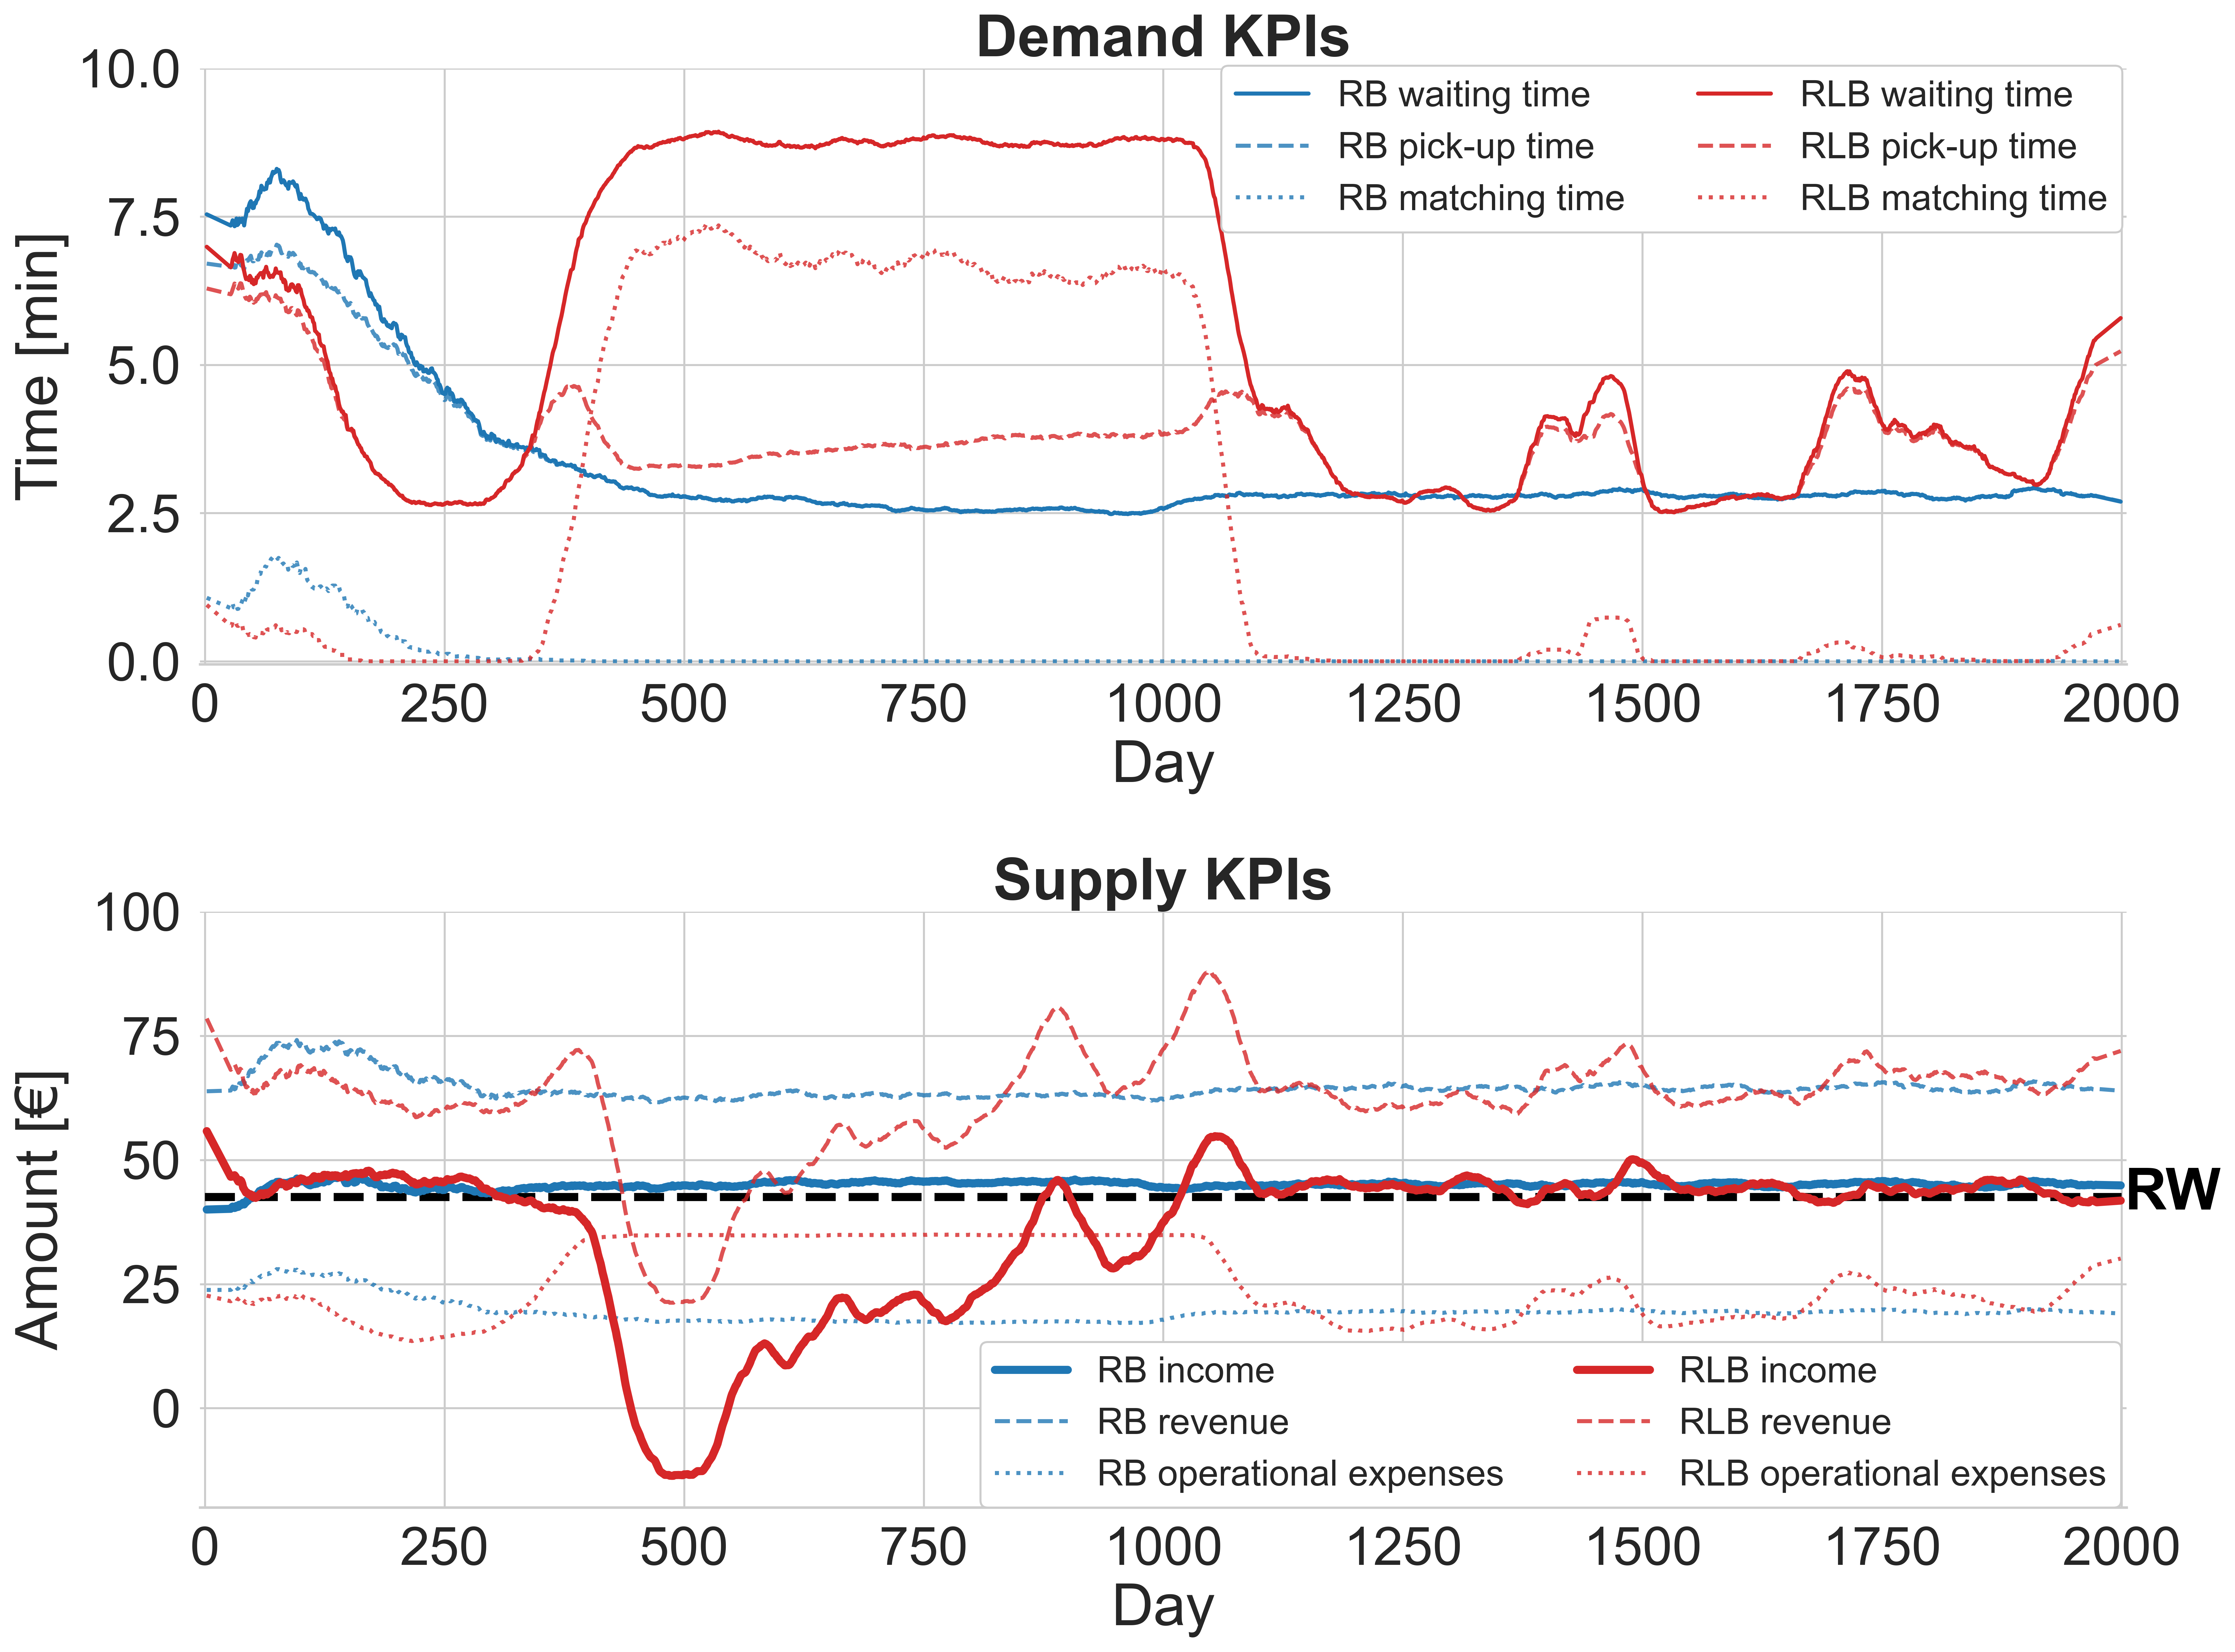

In [183]:
# Demand and Supply participation

sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=2.4)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, figsize=(16,12))
# plt.subplots_adjust(wspace=0.3, hspace=0.4)
sns.despine(left=True)

alpha=0.8
sns.lineplot(x=db.index , y=smooth(db.ACTUAL_WT), label = 'RB waiting time', color=bc, lw=2, ax=ax[0])
sns.lineplot(x=db.index , y=smooth(sb.ARRIVES_AT_PICKUP/(sb.nRIDES*60)), label = 'RB pick-up time', color=bc, lw=2, linestyle = 'dashed',alpha=alpha, ax=ax[0])
sns.lineplot(x=db.index , y=smooth(db.MATCHING_T), label = 'RB matching time', color=bc, lw=2,linestyle = 'dotted',alpha=alpha, ax=ax[0])

sns.lineplot(x=d.index , y=smooth(d.ACTUAL_WT), label = 'RLB waiting time', color=rc, lw=2, ax=ax[0])
sns.lineplot(x=d.index , y=smooth(s.ARRIVES_AT_PICKUP/(s.nRIDES*60)), label = 'RLB pick-up time', color=rc, lw=2, linestyle = 'dashed',alpha=alpha, ax=ax[0])
sns.lineplot(x=d.index , y=smooth(d.MATCHING_T), label = 'RLB matching time', color=rc, lw=2,linestyle = 'dotted',alpha=alpha, ax=ax[0])

ax[0].set(xlabel='Day', ylabel='Time [min]', ylim=(-0.05,10),  xlim=(-5,2005))
ax[0].set_title('Demand KPIs',fontweight='bold')
ax[0].legend(loc=(0.53,0.725),framealpha=1, ncol=2, fancybox=True, fontsize=18)

#-------------
sns.lineplot(x=db.index , y=smooth(sb.ACTUAL_INC), label = 'RB income', color=bc, lw=4, ax=ax[1])
sns.lineplot(x=db.index , y=smooth(sb.REVENUE), label = 'RB revenue', color=bc, lw=2, linestyle = 'dashed',alpha=alpha, ax=ax[1])
sns.lineplot(x=db.index , y=smooth(sb.COST), label = 'RB operational expenses', color=bc, lw=2, linestyle = 'dotted',alpha=alpha, ax=ax[1])

profit = [a - b for a, b in zip(smooth(s.REVENUE), smooth(s.COST))]
sns.lineplot(x=d.index , y=profit, label = 'RLB income', color=rc, lw=4, ax=ax[1])
sns.lineplot(x=d.index , y=smooth(s.REVENUE), label = 'RLB revenue', color=rc, lw=2,linestyle = 'dashed',alpha=alpha, ax=ax[1])
sns.lineplot(x=d.index , y=smooth(s.COST), label = 'RLB operational expenses', color=rc, lw=2, linestyle = 'dotted',alpha=alpha, ax=ax[1])

rw = 4*10.63
ax[1].hlines([rw], 0, 2000, linestyles='dashed', colors='black', lw=4)
ax[1].annotate('RW', xy =(2000+3,40), fontweight='bold', color='black') 

ax[1].set(xlabel='Day', ylabel='Amount [€]', ylim=(-20,100),  xlim=(-5,2005))
ax[1].set_title('Supply KPIs',fontweight='bold')
ax[1].legend(loc=(0.405,0.0),framealpha=1, ncol=2, fancybox=True, fontsize=18)

fig.align_ylabels()
plt.tight_layout()
plt.savefig('Figs/itsc_Fig3.png')

In [172]:
db.ACTUAL_WT[1900:2000].mean()

2.8426147944960762